# Two-class AdaBoost Demo 

See [official documentation]( http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)for more details. 

In [ ]:
%matplotlib inline

In [11]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (10, 6)


A simple demo of AdaBoost using sklearn



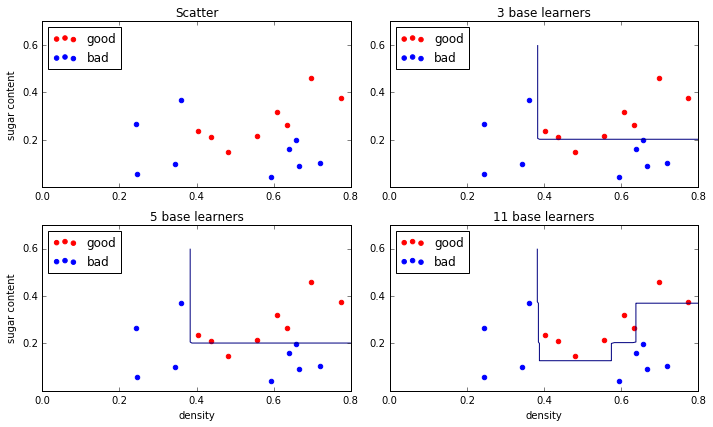

In [12]:
"""
A simple demo of AdaBoost using sklearn
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
print(__doc__)
step_num = 100

# load data
xigua_data = np.loadtxt("xigua3alpha.data", skiprows=1)
xigua_x = xigua_data[:, 0:2]
xigua_y = xigua_data[:, 2].astype(int)
xigua_y[xigua_y == 0] = -1

# plot data points
def draw_scatter(fig, ylab = True, xlab = True):
    """
    Scatter figure: denstiy versus sugar cotent
    """
    good = plt.scatter(xigua_x[xigua_y == 1, 0], xigua_x[xigua_y == 1, 1], color = 'r')
    bad = plt.scatter(xigua_x[xigua_y == -1, 0], xigua_x[xigua_y == -1, 1], color = 'b')
    plt.legend((good, bad), ('good', 'bad'), loc = "upper left")
    if xlab:
        plt.xlabel("density")
    if ylab:
        plt.ylabel("sugar content")
    fig.set_xlim([0, 0.8])
    fig.set_ylim([0, 0.7])
    fig.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
    fig.set_yticks([0.2, 0.4, 0.6])
    fig.set_figsize_inches = (3, 3)


def draw_contour(bdt_model):
    """
    Draw decsion boundaries of bdt_model, namely the contours at prob = 0.5
    """
    xx, yy = np.meshgrid(np.linspace(0, 0.8, num = step_num), np.linspace(0, 0.6, num = step_num))
    zz = bdt_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    zz = zz.reshape(xx.shape)
    plt.contour(xx, yy, zz, levels = [0.5])

#  create and fit model
bdt3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), algorithm='SAMME', n_estimators=3)
bdt5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), algorithm='SAMME', n_estimators=5)
bdt11 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), algorithm='SAMME', n_estimators=11)

bdt3.fit(xigua_x, xigua_y)
bdt5.fit(xigua_x, xigua_y)
bdt11.fit(xigua_x, xigua_y)

# plot  scatter and descion boundaries 
fig1 = plt.subplot(221)
draw_scatter(fig1, xlab = False)
fig1.set_title("Scatter")

fig2 = plt.subplot(222)
fig2.set_title("3 base learners")
draw_scatter(fig2, ylab = False, xlab = False)
draw_contour(bdt3)    

fig3 = plt.subplot(223)
fig3.set_title("5 base learners")
draw_scatter(fig3)
draw_contour(bdt5)

fig4 = plt.subplot(224)
fig4.set_title("11 base learners")
draw_scatter(fig4, ylab = False)
draw_contour(bdt11)
plt.tight_layout()
plt.show()